# Assignment-03 Kaveh Sheikhhassani
# Included in your Jupyter Notebook

Please add sufficient comments: not just explaining what you are doing, but why you are doing it.

- Explain briefly in your own words how linear regression works
- Your pre-processing steps
- The head() of the resulting data frame
- Splitting the dataset into a training and test set
- Training a linear regression model to predict the number of shares, using exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable). Report:
- How you selected the variables
- An equation of the model (please use Markdown formulas)
- Plots of the relation of your selected variables with the target
- Comment on the linearity of those relationships
- Evaluating the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigating the residuals

# How linear regression works?

stimating the formula of a line that the data are most closly to it. The formula include to variable dependent and independent.

In [99]:
#Import libraries
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [100]:
# Calling and Opening Dataframe
df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


#### From slides
Based on this, choose 3 variables from the Funda data set as your independent variables (X) 
for the dependent variable price (Y). 
You want variables that have a linear relation and correlate well with price. 
Note: it does not work very well to select variables that are highly correlated with each other, such as rooms and bedrooms.
You want variables that have a linear relation and correlate well with price. Note: it does not work very well to select variables that are highly correlated with each other, such as rooms and bedrooms.

##### Assignment
Training a linear regression model to predict the number of shares (Y), using exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable) (X). 

In [101]:
# According to exercise-3 to select variables. (we will calculate correlation and
# select those are highly correlated with 'shares' and not highly correlated each other.)
cor = df.corr()

In [102]:
df_tr_sel = df[['id', 'n_tokens_title', 'num_imgs', 'num_videos', 'is_weekend', 'global_subjectivity', 'shares']]
df_tr_sel .head()

,id,n_tokens_title,num_imgs,num_videos,is_weekend,global_subjectivity,shares
0,1,10,12,0,0,0.439379,2100
1,2,9,6,0,0,0.300454,274
2,3,11,0,1,0,0.575486,1500
3,4,8,2,0,0,0.327220,2000
4,5,9,18,0,0,0.507709,6000


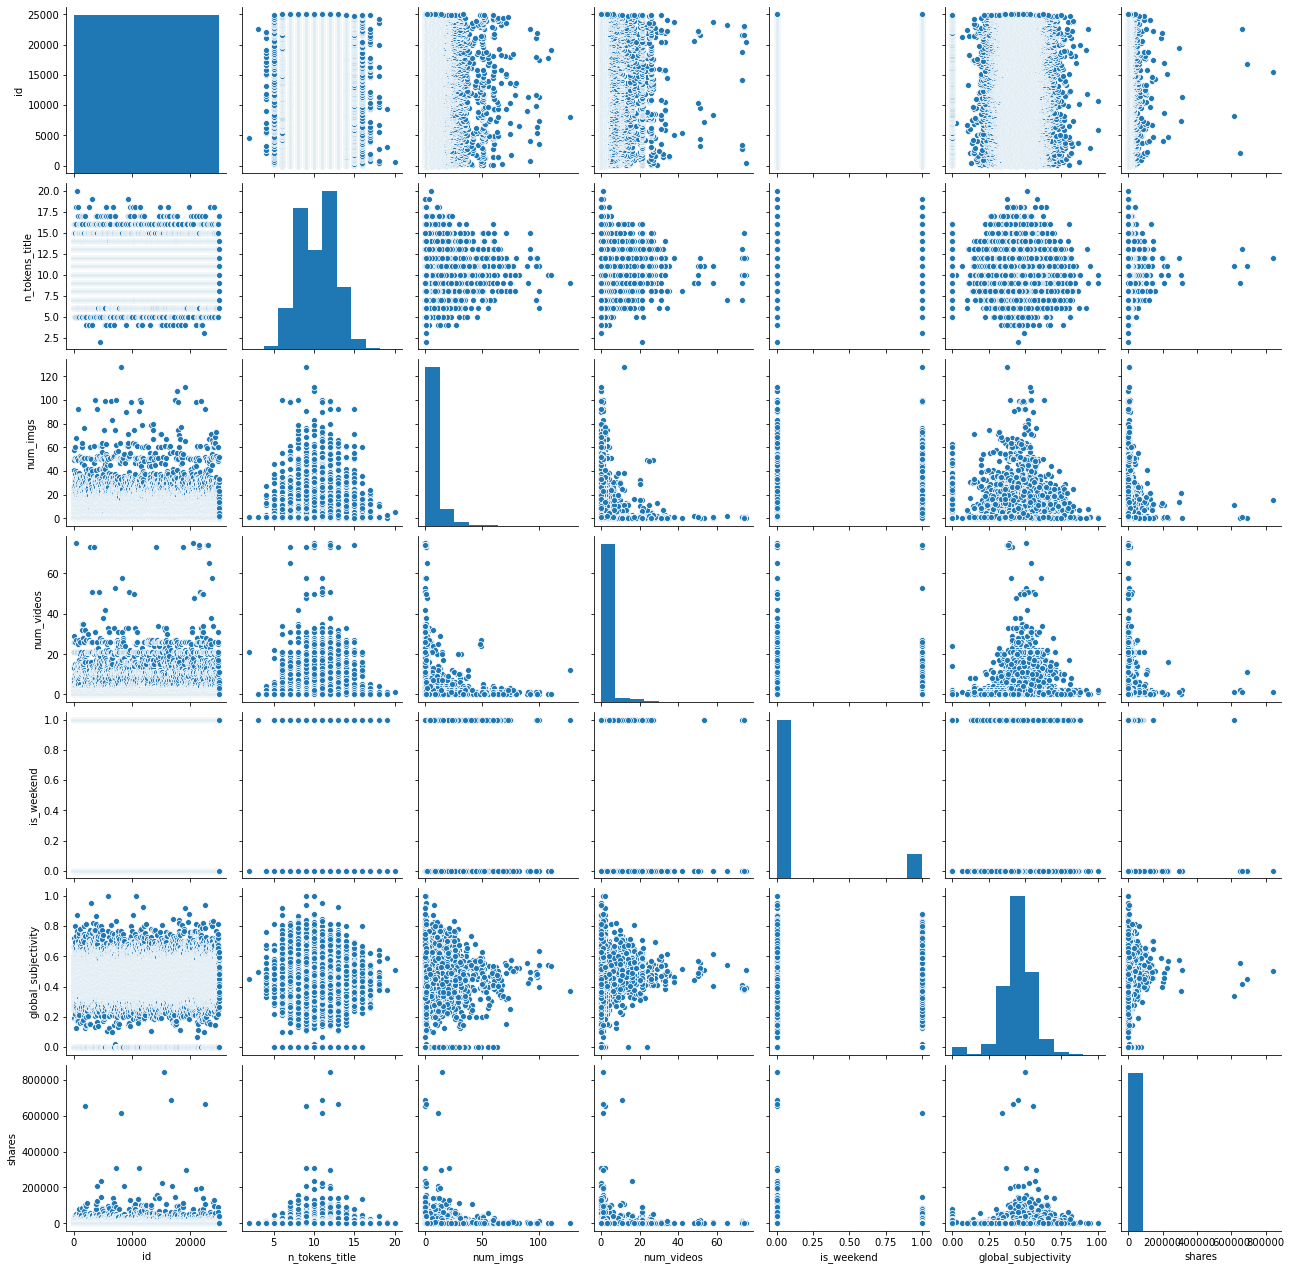

In [103]:
sns.pairplot(df_tr_sel)

The result of plot is a little bit strange for me.

In [104]:
df_tr_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   24999 non-null  int64  
 1   n_tokens_title       24999 non-null  int64  
 2   num_imgs             24999 non-null  int64  
 3   num_videos           24999 non-null  int64  
 4   is_weekend           24999 non-null  int64  
 5   global_subjectivity  24999 non-null  float64
 6   shares               24999 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.3 MB


#### Usually in machine learning, we split the data at the beginning into a training (70-80%) and test set (20-30%), number of data is almost 25000

In [105]:
# Splitting the dataset into a training 70-80%
df_train = df_tr_sel[df_tr_sel['id']<18000]
df_train.head()

,id,n_tokens_title,num_imgs,num_videos,is_weekend,global_subjectivity,shares
0,1,10,12,0,0,0.439379,2100
1,2,9,6,0,0,0.300454,274
2,3,11,0,1,0,0.575486,1500
3,4,8,2,0,0,0.327220,2000
4,5,9,18,0,0,0.507709,6000


In [106]:
# Splitting the dataset into a test set  20-30%
df_test = df_tr_sel[df_tr_sel['id']>17999]
df_test.head()

,id,n_tokens_title,num_imgs,num_videos,is_weekend,global_subjectivity,shares
17999,18000,10,2,7,0,0.390460,1100
18000,18001,13,1,0,0,0.503294,854
18001,18002,9,1,0,0,0.522222,1400
18002,18003,9,12,0,0,0.581905,5200
18003,18004,13,1,0,0,0.554743,3700


In [107]:
x = df_train[['n_tokens_title', 'num_imgs', 'is_weekend', 'global_subjectivity']]
x.head()
y = df_train['shares']

In [108]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)
lm.coef_

array([  76.21210933,   49.49041937,  450.36781923, 4875.98447281])

In [109]:
y_p = lm.predict(x)

In [111]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',math.sqrt(mean_squared_error(y,y_p)))

RMSE:  13679.855658297252


I think some thing goes wrong! 𝑦=76.21𝑋+49.5𝑋+450.36𝑋+4876𝑋+13679.85

In [112]:
x_t = df_test[['n_tokens_title', 'num_imgs', 'is_weekend', 'global_subjectivity']]
x_t.head()
y_t = df_test['shares']

In [118]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_t,y_t)
lm.coef_


array([  92.26675485,   58.27453498,  172.9485945 , 4521.80552734])

In [119]:
y_p_t = lm.predict(x_t)

In [120]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',math.sqrt(mean_squared_error(y_t,y_p_t)))

RMSE:  11382.51385715476
